In [32]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
import openml
#our neural network
from neuralnetwork import Network,FCLayer,ActivationLayer,sigmoid,sigmoid_prime,tanh,tanh_prime,categorical_cross_entropy,categorical_cross_entropy_prime,mse,mse_prime

#sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, ConfusionMatrixDisplay, precision_score, make_scorer

# from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

In [33]:
cols = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
        'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=cols)

In [34]:
# Number of samples and number of attributes
num_samples = df_wine.shape[0]
num_attributes = df_wine.shape[1] - 1 # first one is the class annotation
print("The number of samples is: ", str(num_samples))
print("The number of attributes is: ", str(num_attributes))

The number of samples is:  178
The number of attributes is:  13


In [35]:
#Counting the number of samples for each class
wine = df_wine.to_numpy()
num_class_1 = sum(wine[:, 0] == 1)
num_class_2 = sum(wine[:, 0] == 2)
num_class_3 = sum(wine[:, 0] == 3)

print("Number of samples that belong to class 1: ", str(num_class_1))
print("Number of samples that belong to class 2: ", str(num_class_2))
print("Number of samples that belong to class 3: ", str(num_class_3))

Number of samples that belong to class 1:  59
Number of samples that belong to class 2:  71
Number of samples that belong to class 3:  48


### Preparing data for the model

In [36]:
X = df_wine.drop(['class'], axis=1).to_numpy()
Y = df_wine['class']

In [37]:
encoder = OneHotEncoder(sparse = False)
y_reshaped = Y.to_numpy().reshape(-1,1)
y_encoded = encoder.fit_transform(y_reshaped)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1234)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

print('TRAINING')
print('Original data:')
print('Mean:')
print(X_train.mean(axis=0))
print('Std:')
print(X_train.std(axis=0))
print()
print('Standardized data:')
print('Mean:')
print(X_train_standardized.mean(axis=0))
print('Std:')
print(X_train_standardized.std(axis=0))

print('#'*100)


print('TESTING')
print('Original data:')
print('Mean:')
print(X_test.mean(axis=0))
print('Std:')
print(X_test.std(axis=0))
print()
print('Standardized data:')
print('Mean:')
print(X_test_standardized.mean(axis=0))
print('Std:')
print(X_test_standardized.std(axis=0))

X_train = X_train_standardized
X_test = X_test_standardized

TRAINING
Original data:
Mean:
[1.30018310e+01 2.23873239e+00 2.37521127e+00 1.94014085e+01
 1.00669014e+02 2.30014085e+00 2.04154930e+00 3.59577465e-01
 1.59647887e+00 5.07760563e+00 9.66802817e-01 2.60035211e+00
 7.63478873e+02]
Std:
[8.19068192e-01 1.02601297e+00 2.52343155e-01 3.21994195e+00
 1.46156013e+01 6.23772017e-01 9.67826297e-01 1.23692447e-01
 5.87382829e-01 2.32789056e+00 2.37361442e-01 7.17144584e-01
 3.14977324e+02]

Standardized data:
Mean:
[-2.52380276e-15  4.10469780e-16  1.62155109e-15 -1.79668487e-15
  2.85520825e-16 -1.16495233e-15  1.09771347e-15 -2.51754799e-16
 -1.08911315e-15  1.03164738e-15 -1.72006384e-17  1.01640136e-15
 -1.65751606e-16]
Std:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
####################################################################################################
TESTING
Original data:
Mean:
[1.29958333e+01 2.72138889e+00 2.33222222e+00 1.98638889e+01
 9.60833333e+01 2.27527778e+00 1.98083333e+00 3.70833333e-01
 1.56888889e+00 4.98111111e+

In [39]:
X_train.shape

(142, 13)

### Our Neural Network

In [40]:
from neuralnetwork import Network,FCLayer,ActivationLayer
from neuralnetwork import sigmoid,sigmoid_prime,tanh,tanh_prime,categorical_cross_entropy,categorical_cross_entropy_prime,mse,mse_prime,softmax,softmax_prime


#### Neural Network with tanh activation layer

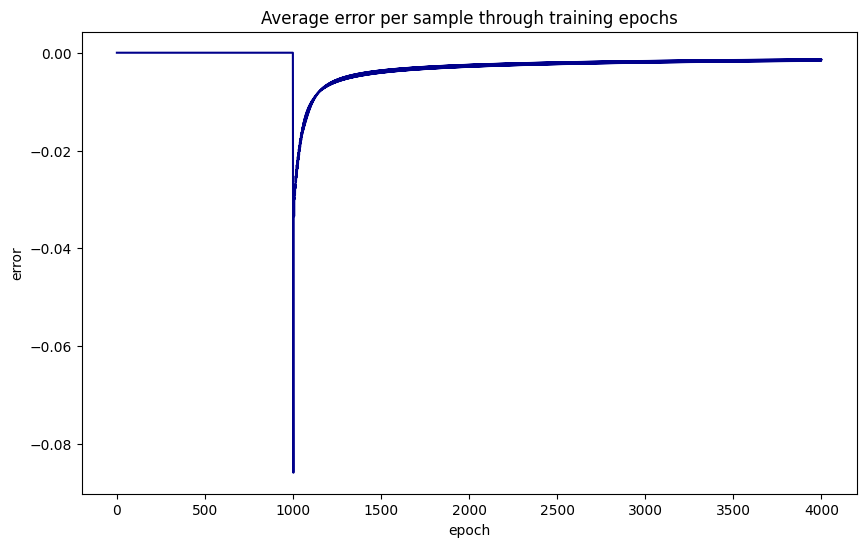

In [55]:
# network with 2 layers
net_tan = Network()
net_tan.add(FCLayer(13, 8))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(8,3))  
net_tan.add(ActivationLayer(tanh, tanh_prime))

# train
net_tan.use(categorical_cross_entropy_prime, categorical_cross_entropy_prime)

err_vect_tan = net_tan.fit(X_train, y_train, epochs=1000, learning_rate=0.1)
net_tan.plot_error_curve(err_vect_tan)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.9444444444444444
##################################################
Recall on train:  1.0
Recall on test:  0.9444444444444444
##################################################
Precision on train:  1.0
Precision on test:  0.9444444444444444
##################################################


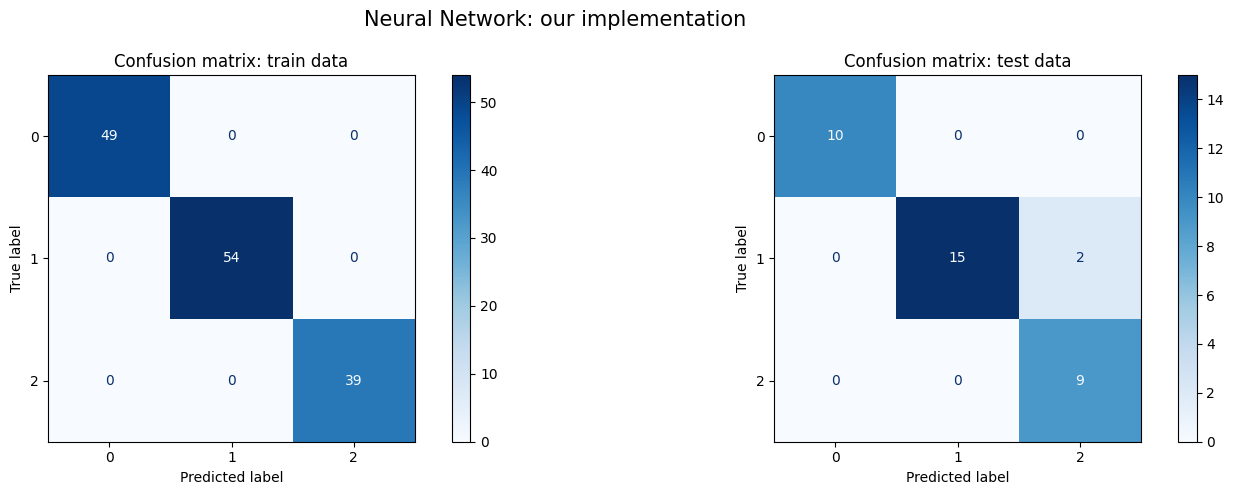

In [56]:
net_tan.nn_evaluate_one_hot(x_train= X_train, y_train=y_train, x_test=X_test, y_test=y_test, epochs=1000, learning_rate=0.1)

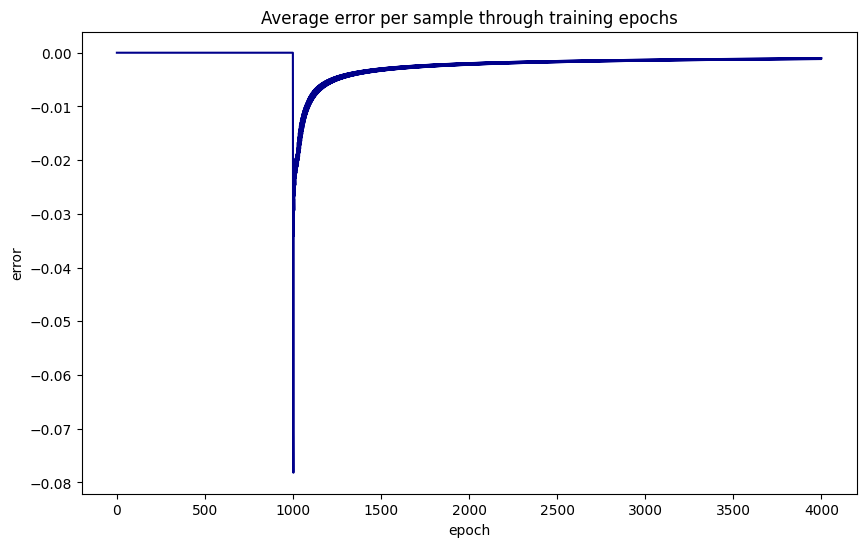

In [57]:
# network with 3 layers
net_tan = Network()
net_tan.add(FCLayer(13, 8))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(8,5))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(5, 3))  
net_tan.add(ActivationLayer(tanh, tanh_prime))

# train
net_tan.use(categorical_cross_entropy_prime, categorical_cross_entropy_prime)

err_vect_tan = net_tan.fit(X_train, y_train, epochs=1000, learning_rate=0.1)
net_tan.plot_error_curve(err_vect_tan)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.9722222222222222
##################################################
Recall on train:  1.0
Recall on test:  0.9722222222222222
##################################################
Precision on train:  1.0
Precision on test:  0.9722222222222222
##################################################


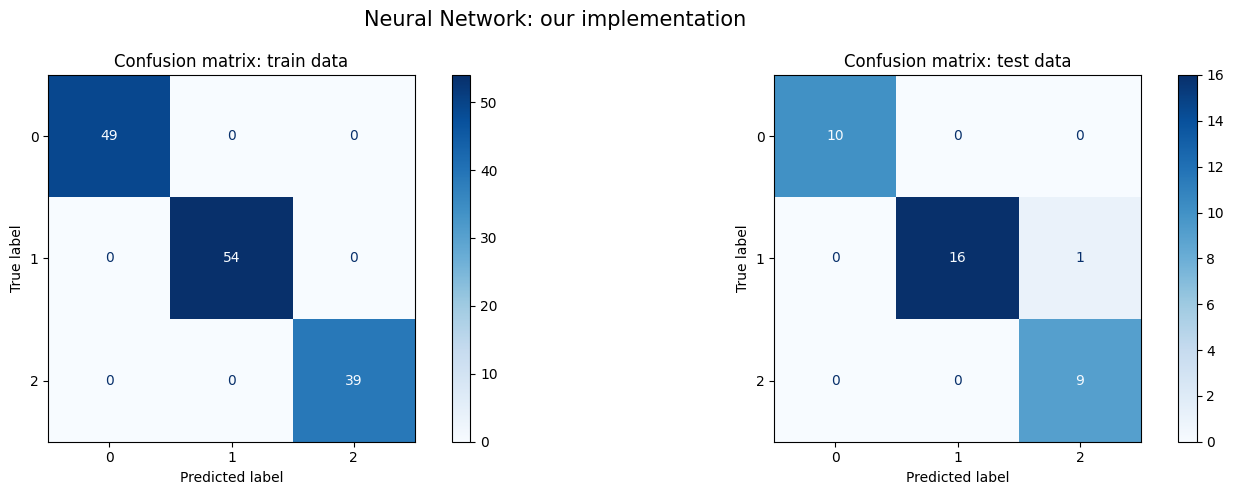

In [53]:
net_tan.nn_evaluate_one_hot(x_train= X_train, y_train=y_train, x_test=X_test, y_test=y_test, epochs=1000, learning_rate=0.1)

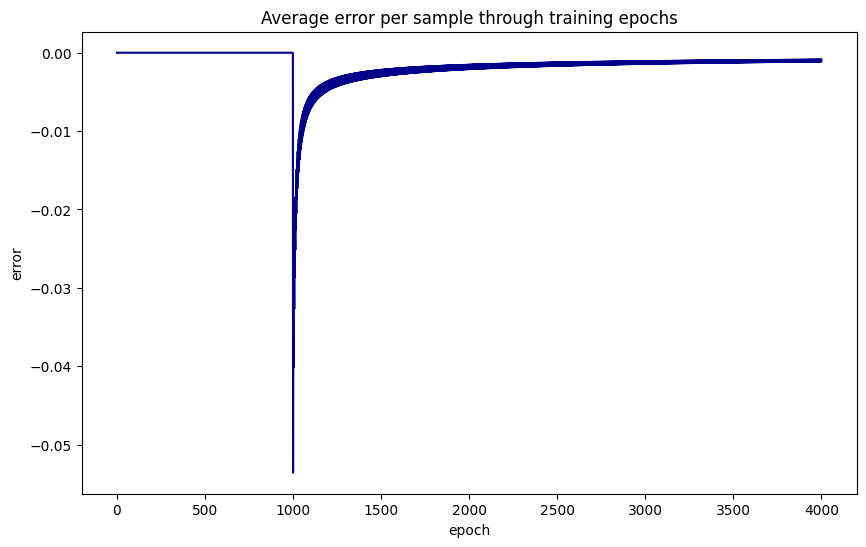

In [59]:
# network with 4 layers
net_tan = Network()
net_tan.add(FCLayer(13, 11))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(11,9))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(9,6))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(6, 3))  
net_tan.add(ActivationLayer(tanh, tanh_prime))

# train
net_tan.use(categorical_cross_entropy_prime, categorical_cross_entropy_prime)

err_vect_tan = net_tan.fit(X_train, y_train, epochs=1000, learning_rate=0.1)
net_tan.plot_error_curve(err_vect_tan)


##################################################
Accuracy on train:  1.0
Accuracy on test:  0.9722222222222222
##################################################
Recall on train:  1.0
Recall on test:  0.9722222222222222
##################################################
Precision on train:  1.0
Precision on test:  0.9722222222222222
##################################################


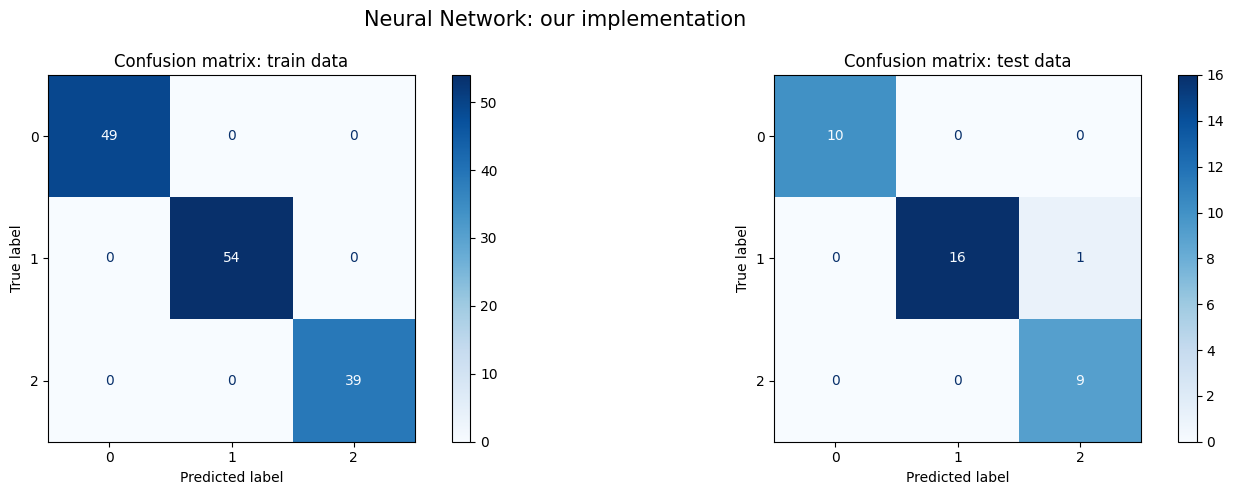

In [60]:
net_tan.nn_evaluate_one_hot(x_train= X_train, y_train=y_train, x_test=X_test, y_test=y_test, epochs=1000, learning_rate=0.1)

#### Neural Network with tanh activation layer and softmax 
As softmax should be applied to the outer layer only, we will use tanh for the other hidden layers

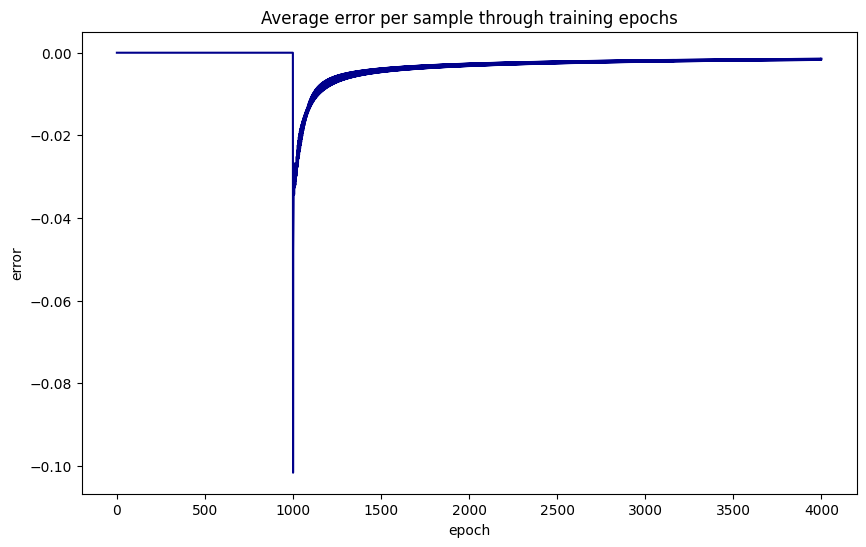

In [61]:
#network with 2 layers
net_soft = Network()
net_soft.add(FCLayer(13, 8))  
net_soft.add(ActivationLayer(tanh, tanh_prime))
net_soft.add(FCLayer(8, 3))  
net_soft.add(ActivationLayer(tanh, tanh_prime))

# train
net_soft.use(categorical_cross_entropy_prime, categorical_cross_entropy_prime)

err_vect_soft = net_soft.fit(X_train, y_train, epochs=1000, learning_rate=0.1)
net_soft.plot_error_curve(err_vect_soft)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.9444444444444444
##################################################
Recall on train:  1.0
Recall on test:  0.9444444444444444
##################################################
Precision on train:  1.0
Precision on test:  0.9444444444444444
##################################################


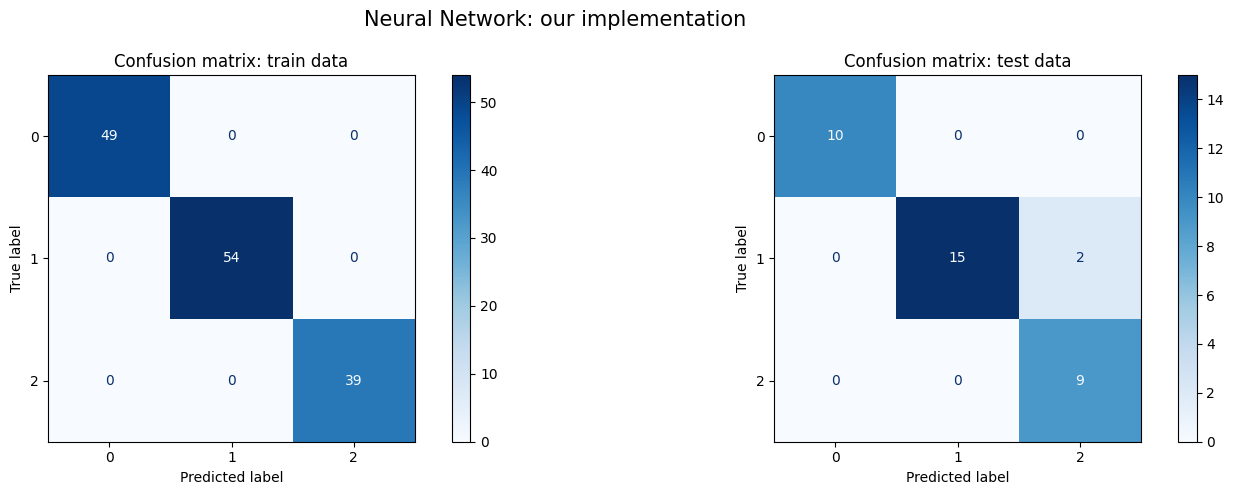

In [63]:
net_soft.nn_evaluate_one_hot(x_train= X_train, y_train=y_train, x_test=X_test, y_test=y_test, epochs=1000, learning_rate=0.1)

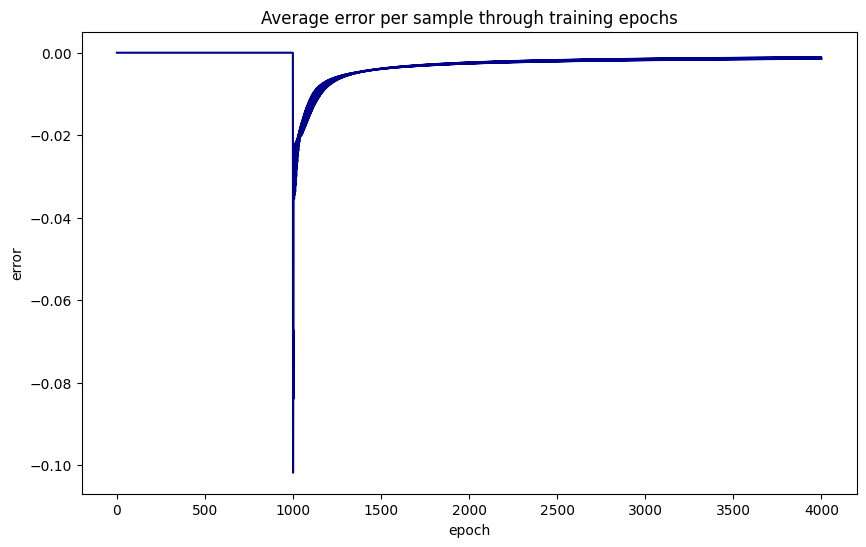

In [67]:
#network with 3 layers
net_soft = Network()
net_soft.add(FCLayer(13, 8))  
net_soft.add(ActivationLayer(tanh, tanh_prime))
net_soft.add(FCLayer(8, 3))  
net_soft.add(ActivationLayer(tanh, tanh_prime))

# train
net_soft.use(categorical_cross_entropy_prime, categorical_cross_entropy_prime)

err_vect_soft = net_soft.fit(X_train, y_train, epochs=1000, learning_rate=0.1)
net_soft.plot_error_curve(err_vect_soft)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.9444444444444444
##################################################
Recall on train:  1.0
Recall on test:  0.9444444444444444
##################################################
Precision on train:  1.0
Precision on test:  0.9444444444444444
##################################################


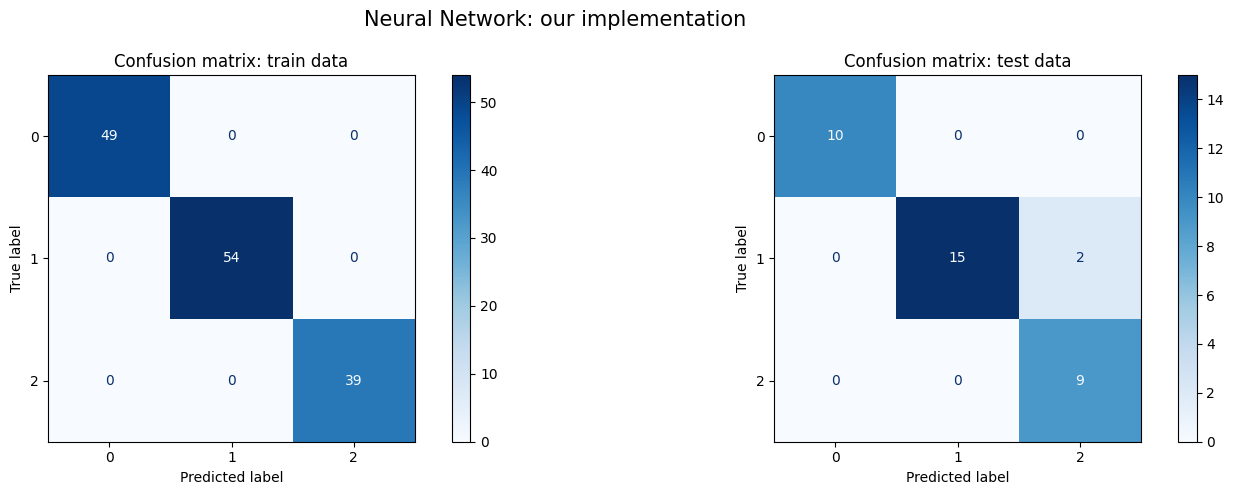

In [65]:
net_soft.nn_evaluate_one_hot(x_train= X_train, y_train=y_train, x_test=X_test, y_test=y_test, epochs=1000, learning_rate=0.1)

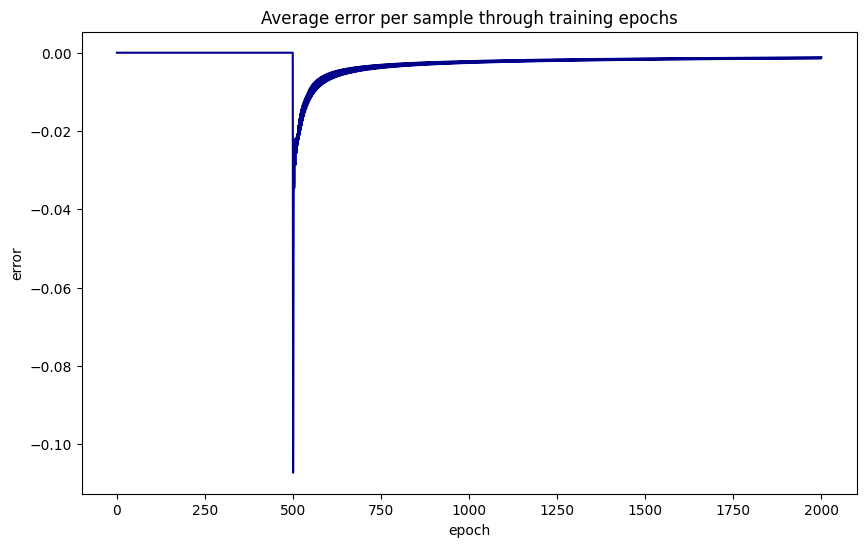

In [73]:
#network with 4 layers
net_soft = Network()
net_soft.add(FCLayer(13, 11))  
net_soft.add(ActivationLayer(tanh, tanh_prime))
net_soft.add(FCLayer(11, 9))  
net_soft.add(ActivationLayer(tanh, tanh_prime))
net_soft.add(FCLayer(9, 6))  
net_soft.add(ActivationLayer(tanh, tanh_prime))
net_soft.add(FCLayer(6, 3))  
net_soft.add(ActivationLayer(tanh, tanh_prime))

# train
net_soft.use(categorical_cross_entropy_prime, categorical_cross_entropy_prime)

err_vect_soft = net_soft.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net_soft.plot_error_curve(err_vect_soft)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.9444444444444444
##################################################
Recall on train:  1.0
Recall on test:  0.9444444444444444
##################################################
Precision on train:  1.0
Precision on test:  0.9444444444444444
##################################################


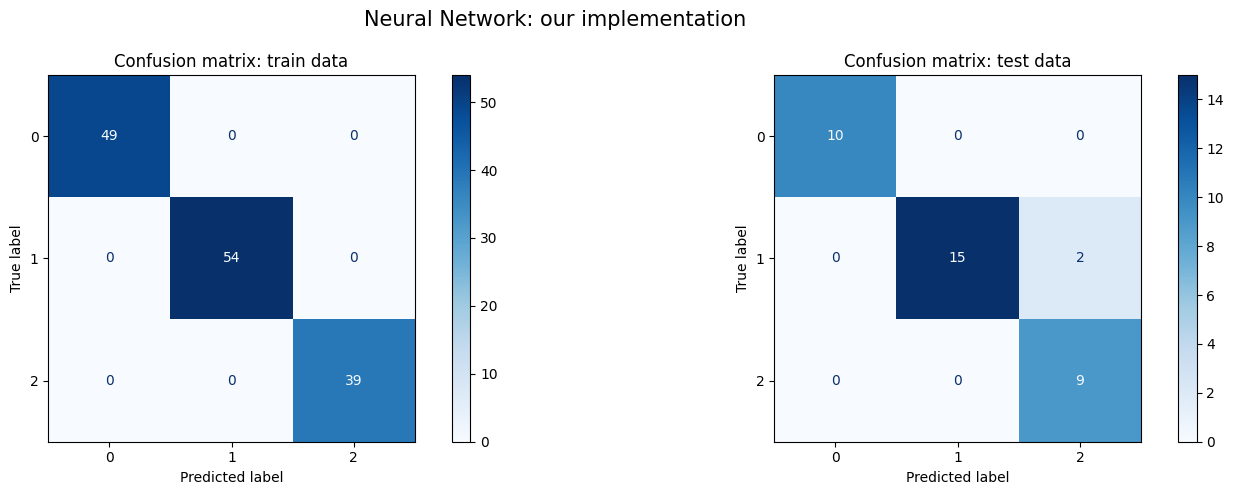

In [75]:
net_soft.nn_evaluate_one_hot(x_train= X_train, y_train=y_train, x_test=X_test, y_test=y_test, epochs=1000, learning_rate=0.1)

#### Cross validation to find the best number of nodes,layers and activation layer

In [96]:
node_numbers = [30,25,20,15,11,9,7,5]
layer_numbers = [2,3,4]
activation_functions = ['tanh', 'softmax']
input_size = 13
output_size = 3


In [83]:
import itertools
from sklearn.model_selection import KFold

In [97]:


# Initialize variables to store the best hyperparameters and performance
best_accuracy = 0
best_nodes = None
best_layers = None
best_activation = None

# Perform cross-validation for each hyperparameter combination
for nodes, layers, activation in itertools.product(node_numbers, layer_numbers, activation_functions):
    # Initialize an array to store the performance metrics for each fold
    accuracy_scores = []

    # Create a KFold instance
    kf = KFold(n_splits=5, shuffle=True)

    # Iterate over the folds
    for train_index, val_index in kf.split(X_train):
        # Split the data into training and validation sets
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Initialize and train your neural network with the current hyperparameters
        net = Network()
    
        net.add(FCLayer(input_size, nodes))
        net.add(ActivationLayer(tanh, tanh_prime))
        for _ in range(layers - 1):
            net.add(FCLayer(nodes, nodes))
            net.add(ActivationLayer(tanh, tanh_prime))
        net.add(FCLayer(nodes, output_size))
        if activation == 'tanh':
            net.add(ActivationLayer(tanh, tanh_prime))
            net.use(categorical_cross_entropy_prime, categorical_cross_entropy)
        else:
            net.add(ActivationLayer(softmax, softmax_prime))
            net.use(categorical_cross_entropy_prime, categorical_cross_entropy)

        # Train the network
        net.fit(X_train_fold, y_train_fold, epochs=100, learning_rate=0.1)

        y_val_pred = net.predict(X_val_fold)
        y_val_pred = np.concatenate(y_val_pred)

        # Convert one-hot encoded predictions back to class labels
        y_val_pred_labels = np.argmax(y_val_pred, axis=1)
        y_val_labels = np.argmax(y_val_fold, axis=1)

        # Convert one-hot encoded true labels back to class labels
        y_val_labels = np.argmax(y_val_fold, axis=1)


        accuracy = accuracy_score(y_true=y_val_labels, y_pred=y_val_pred_labels)
        accuracy_scores.append(accuracy)

    # Calculate the average accuracy across all folds
    average_accuracy = np.mean(accuracy_scores)

    # Update the best hyperparameters if the current combination performs better
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_nodes = nodes
        best_layers = layers
        best_activation = activation

# Print the best hyperparameters and performance
print("Best Nodes:", best_nodes)
print("Best Layers:", best_layers)
print("Best Activation Function:", best_activation)
print("Best Accuracy:", best_accuracy)


Best Nodes: 30
Best Layers: 2
Best Activation Function: softmax
Best Accuracy: 0.5004926108374385
